In [0]:
import numpy as np
from sklearn import svm
from google.colab import files
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pickle

In [11]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving elbow_table.txt to elbow_table (1).txt
Saving arm_straight.txt to arm_straight (1).txt
Saving arm_down.txt to arm_down (1).txt
Saving arm_across.txt to arm_across (1).txt
User uploaded file "elbow_table.txt" with length 31134 bytes
User uploaded file "arm_across.txt" with length 28697 bytes
User uploaded file "arm_down.txt" with length 33172 bytes
User uploaded file "arm_straight.txt" with length 29533 bytes


In [14]:
arr_list = []
data = np.zeros([1, 6])
labels = np.zeros([1, 1])
for k, v in uploaded.items():
  print(k)
  text_file = open(k, "w")
  text_file.write(uploaded[k].decode("utf-8") )
  text_file.close()
  # Thanks to Aura Barrera for this short cut!
  arr = np.loadtxt(fname=k, encoding="ISO-8859-1")
  print(arr.shape)
  arr_list.append(arr.shape)
  data = np.vstack((data, arr))
  num_data = arr.shape[0]
  labels = np.vstack((labels, np.full((num_data, 1), k)))
data = np.delete(data, (0), axis=0)
labels = np.delete(labels, (0), axis=0)

elbow_table.txt
(357, 6)
arm_across.txt
(333, 6)
arm_down.txt
(388, 6)
arm_straight.txt
(334, 6)


In [15]:
svm_model = svm.SVC(gamma='scale')
svm_model.fit(data, labels )
svm_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [0]:
pickle_fname = "pickle_elnaz_model.sav"
pickle.dump(svm_model, open(pickle_fname, "wb"))
from google.colab import files
files.download(pickle_fname)

In [6]:
# random testing
point1 = np.asarray([[7.28, 0.1915, -7.867, -5.02, 1.67, -8.27]]) # should be arm straight forward
point2 = np.asarray([[2.79, 9.82, -1.939, -1.79, 9.32, 1.4]]) # should be arm down
point3 = np.asarray([[8.56, 2.87, -6.00, -6.7, 6.45, -2.2]]) # should be arm across
point4 = np.asarray([[5, 5, 5, 5, 5, 5]]) # should be random
svm_model.predict(point3)

array([u'elbow_table.txt'], dtype='<U32')

In [0]:
reduced = TSNE(n_components=2).fit_transform(data)

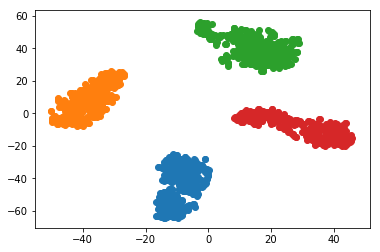

In [17]:
index = 0
for sh in arr_list:
  plt.scatter(reduced[index:index + sh[0], 0], reduced[index: index + sh[0], 1])
  index += sh[0]
plt.show()

In [18]:


# import sklearn.discriminant_analysis as QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda_model = QDA()
qda_model.fit(data, labels)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [19]:
qda_model.predict(point3)

array([u'arm_across.txt'], dtype='<U32')